<a href="https://colab.research.google.com/github/Tanu-N-Prabhu/Python/blob/master/Data%20Analysis/Level%205/a_b_testing_%26_experiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **A/B Testing & Experiments**
_Beginner’s Guide_



# 1. GOAL
Goal:
Understand and perform a basic A/B test to compare two versions of a product, feature, or campaign.
We will:
1. Simulate user conversion data for Group A and Group B.
2. Explore the data visually.
3. Perform statistical tests to see if the difference is significant.
4. Draw conclusions.

Why:
A/B testing helps us make data-driven decisions by comparing performance between two groups.


# 2. INTRODUCTION
A/B Testing:
- A = Control group (current version)
- B = Treatment group (new version)
We randomly assign users to either group and measure performance (e.g., conversion rate).

Key Terms:
- Null Hypothesis (H0): No difference between A and B.
- Alternative Hypothesis (H1): There is a difference.
- p-value: Probability of observing data as extreme as ours if H0 is true.
- Significance level (alpha): Usually 0.05.

If p-value < alpha: Reject H0 (there IS a significant difference).

# 3. IMPORT LIBRARIES


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

plt.style.use('seaborn-v0_8-whitegrid')

# 4. CREATE A SIMPLE DATASET
We simulate:
- Group A: Baseline conversion rate ~ 12%
- Group B: Improved version ~ 15%
We generate binary outcomes: 1 = converted, 0 = not converted



In [2]:
np.random.seed(42)  # reproducibility
n_A, n_B = 1000, 1000
group_A = np.random.binomial(1, 0.12, n_A)
group_B = np.random.binomial(1, 0.15, n_B)

df = pd.DataFrame({
    'Group': ['A']*n_A + ['B']*n_B,
    'Converted': np.concatenate([group_A, group_B])
})

print("First 5 rows:")
df.head()

First 5 rows:


,Group,Converted
0,A,0
1,A,1
2,A,0
3,A,0
4,A,0


# 5. EXPLORE THE DATA



Conversion Rates:
Group
A    0.124
B    0.152
Name: Converted, dtype: float64


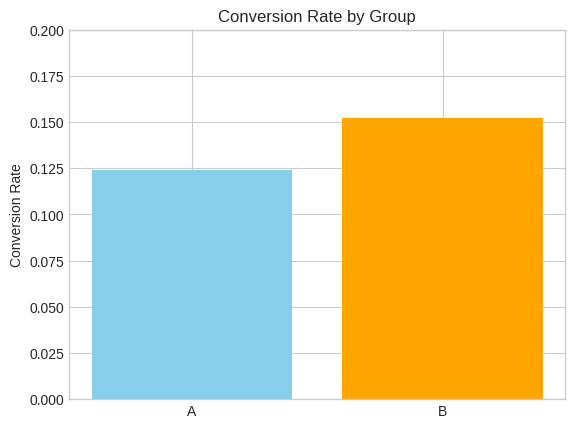

In [3]:
conversion_rates = df.groupby('Group')['Converted'].mean()
print("\nConversion Rates:")
print(conversion_rates)

plt.bar(conversion_rates.index, conversion_rates.values, color=['skyblue', 'orange'])
plt.ylabel("Conversion Rate")
plt.title("Conversion Rate by Group")
plt.ylim(0, 0.2)
plt.show()

# 6. HYPOTHESIS TESTING

We use an independent samples t-test to compare means between groups.

```
H0: mean_A = mean_B

H1: mean_A ≠ mean_B
```

In [4]:
t_stat, p_val = stats.ttest_ind(group_A, group_B)
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_val:.4f}")

alpha = 0.05
if p_val < alpha:
    print("Reject H0: Significant difference between A and B")
else:
    print("Fail to Reject H0: No significant difference between A and B")

T-statistic: -1.8159
P-value: 0.0695
Fail to Reject H0: No significant difference between A and B


# 7. CONCLUSION
We found:
- Group A conversion rate ≈ {:.2%}
- Group B conversion rate ≈ {:.2%}
- p-value = {:.4f}

Interpretation:
If p-value < 0.05, we conclude the difference is statistically significant.
Otherwise, we conclude there is no strong evidence of a difference.

A/B tests help businesses decide whether a change improves performance before fully rolling it out.
```
.format(conversion_rates['A'], conversion_rates['B'], p_val)
```